In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Getting Random Lats and Longs to Use

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(43.22272760217663, 64.61308628765721),
 (29.954647562162208, -23.299531711260073),
 (25.965552749554107, 105.2735377434563),
 (86.1981867881691, -111.50289229342724),
 (-33.127765568065314, -141.87506993796117),
 (-86.15125080497171, 136.8195169360751),
 (75.25517343449391, -114.9893778499736),
 (13.810108409820629, 22.688057382982123),
 (-45.91919685680422, -78.70658265581002),
 (-26.08803116883218, 86.91085434562939),
 (-11.440555475576502, 158.161294679736),
 (-9.099572351241761, 35.33924666400148),
 (-45.726454183154964, -70.72657579091322),
 (-60.640058387490264, 72.58144809771352),
 (63.22676084090659, -16.586950840395616),
 (-18.860543001985832, -18.87810481225901),
 (18.981199423751974, -23.06534340777523),
 (-60.8520832367044, -111.5549606942067),
 (-81.74066034132764, 91.68611364658153),
 (-4.610551761505064, 119.84391919657457),
 (-6.230610602372451, 79.4056223163659),
 (-48.286630656581465, 138.03860127289448),
 (2.439420886908522, -137.44670916391962),
 (-59.618694636335

# Getting the Closest City Using Lats and Longs

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

512

# Retrieving Weather Data using List of Cities using enumerate

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# find out what verion we are using to get requests
#requests.__version__

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
total_record_count = 0

# Loop through all the cities in the list.
for i, city in enumerate(cities):
   
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
    
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create URL for each each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record counts.
    record_count += 1
    total_record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Append data to city_data 
        city_data.append({"City": city.title(),
                          "Lat": city_weather["coord"]["lat"],
                          "Lng": city_weather["coord"]["lon"],
                          "Max Temp": city_weather["main"]["temp_max"],
                          "Humidity": city_weather["main"]["humidity"],
                          "Cloudiness": city_weather["clouds"]["all"], 
                          "Wind Speed": city_weather["wind"]["speed"],
                          "Country": city_weather["sys"]["country"], 
                          "Date": datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(f"Records found: {total_record_count}.")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasbuget
City not found. Skipping...
Processing Record 2 of Set 1 | los llanos de aridane
Processing Record 3 of Set 1 | anshun
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | adre
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | honiara
Processing Record 11 of Set 1 | makungu
Processing Record 12 of Set 1 | coihaique
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | santa maria
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | bone
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | atuona
Processing

Processing Record 38 of Set 4 | bartica
Processing Record 39 of Set 4 | gornopravdinsk
Processing Record 40 of Set 4 | saskylakh
Processing Record 41 of Set 4 | vaitape
Processing Record 42 of Set 4 | general pico
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | surt
Processing Record 46 of Set 4 | contamana
Processing Record 47 of Set 4 | jamestown
Processing Record 48 of Set 4 | barrow
Processing Record 49 of Set 4 | dzhebariki-khaya
Processing Record 50 of Set 4 | morondava
Processing Record 1 of Set 5 | peace river
Processing Record 2 of Set 5 | glen allen
Processing Record 3 of Set 5 | campbell river
Processing Record 4 of Set 5 | umba
Processing Record 5 of Set 5 | loiza
Processing Record 6 of Set 5 | ingham
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | chuy
Processing Record 9 of Set 5 | augsburg
Processing Record 10 of Set 5 | asau
Processing Record 11 of Set 5 | cabo san lucas
Processing Rec

Processing Record 25 of Set 8 | sayyan
Processing Record 26 of Set 8 | lata
Processing Record 27 of Set 8 | itarema
Processing Record 28 of Set 8 | trairi
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | farah
Processing Record 31 of Set 8 | fort nelson
Processing Record 32 of Set 8 | utiroa
City not found. Skipping...
Processing Record 33 of Set 8 | ciudad bolivar
Processing Record 34 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | jumla
Processing Record 37 of Set 8 | port blair
Processing Record 38 of Set 8 | dodola
Processing Record 39 of Set 8 | shitanjing
Processing Record 40 of Set 8 | codrington
Processing Record 41 of Set 8 | xai-xai
Processing Record 42 of Set 8 | chicama
Processing Record 43 of Set 8 | changji
Processing Record 44 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 45 of Set 8 | ajdabiya
Processing Record 46 of Set 8 | coquimbo
Processin

# City Data List to DataFrame

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Los Llanos De Aridane,28.6585,-17.9182,69.55,96,40,5.75,ES,2021-11-21 21:05:25
1,Anshun,26.2500,105.9333,38.52,92,100,11.90,CN,2021-11-21 21:05:26
2,Yellowknife,62.4560,-114.3525,4.41,90,100,11.01,CA,2021-11-21 21:05:08
3,Rikitea,-23.1203,-134.9692,73.54,66,0,6.49,PF,2021-11-21 21:00:45
4,Hobart,-42.8794,147.3294,59.11,83,75,1.01,AU,2021-11-21 21:00:18
5,Adre,13.4667,22.2000,71.76,22,28,12.77,TD,2021-11-21 21:05:27
6,Castro,-24.7911,-50.0119,70.84,57,9,3.18,BR,2021-11-21 21:00:55
7,Carnarvon,-24.8667,113.6333,65.75,66,2,14.50,AU,2021-11-21 21:05:28
8,Honiara,-9.4333,159.9500,82.58,71,2,3.36,SB,2021-11-21 21:02:43
9,Makungu,-8.7333,35.2833,65.14,63,22,3.13,TZ,2021-11-21 21:05:28


In [13]:
# Reorder Columns: City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Los Llanos De Aridane,ES,2021-11-21 21:05:25,28.6585,-17.9182,69.55,96,40,5.75
1,Anshun,CN,2021-11-21 21:05:26,26.2500,105.9333,38.52,92,100,11.90
2,Yellowknife,CA,2021-11-21 21:05:08,62.4560,-114.3525,4.41,90,100,11.01
3,Rikitea,PF,2021-11-21 21:00:45,-23.1203,-134.9692,73.54,66,0,6.49
4,Hobart,AU,2021-11-21 21:00:18,-42.8794,147.3294,59.11,83,75,1.01
...,...,...,...,...,...,...,...,...,...
463,Turkistan,KZ,2021-11-21 21:18:01,43.0000,68.0000,44.01,45,90,11.43
464,Lipin Bor,RU,2021-11-21 21:18:01,60.2622,37.9763,25.88,89,47,13.85
465,Chumikan,RU,2021-11-21 21:18:01,54.7183,135.3150,-4.88,89,16,3.71
466,Norman Wells,CA,2021-11-21 21:18:02,65.2820,-126.8329,-14.76,76,75,2.30


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Start of Plotting

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

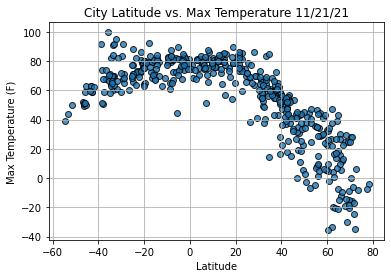

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")
# Show plot.
plt.show()

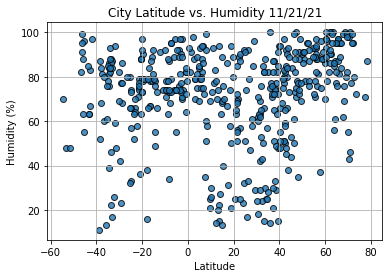

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

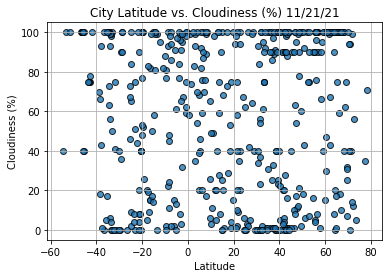

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

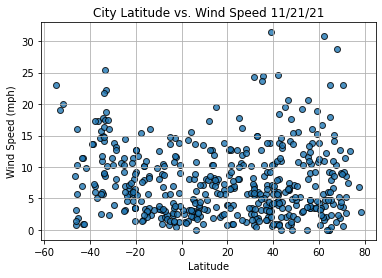

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Linear Regression on Weather Data

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [115]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    correlation_coefficient = r_value
    print (f"Correlation coefficient is: {r_value:.3f}")
    print (f"Probability value is: {p_value:.3f}")
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.show()


# Creating DataFrames for Northern and Southern Hemispheres (using equator's Latitude)

In [116]:
index13 = city_data_df.loc[13]
index13

City                   Georgetown
Country                        MY
Date          2021-11-21 20:56:37
Lat                        5.4112
Lng                      100.3354
Max Temp                    78.89
Humidity                       93
Cloudiness                     40
Wind Speed                    3.0
Name: 13, dtype: object

In [117]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
463     True
464     True
465     True
466     True
467     True
Name: Lat, Length: 468, dtype: bool

In [118]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Los Llanos De Aridane,ES,2021-11-21 21:05:25,28.6585,-17.9182,69.55,96,40,5.75
1,Anshun,CN,2021-11-21 21:05:26,26.2500,105.9333,38.52,92,100,11.90
2,Yellowknife,CA,2021-11-21 21:05:08,62.4560,-114.3525,4.41,90,100,11.01
5,Adre,TD,2021-11-21 21:05:27,13.4667,22.2000,71.76,22,28,12.77
12,Hofn,IS,2021-11-21 21:03:11,64.2539,-15.2082,39.22,87,0,9.22


In [119]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Correlation coefficient is: -0.863
Probability value is: 0.000


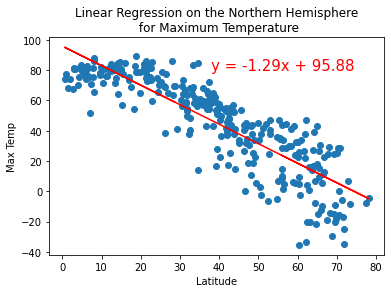

In [120]:
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Maximum Temperature''', 'Max Temp',(38,80))

Correlation coefficient is: 0.528
Probability value is: 0.000


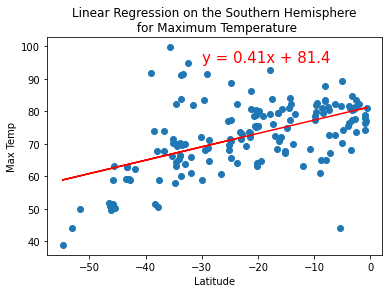

In [121]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Maximum Temperature''', 'Max Temp',(-30,95))

Correlation coefficient is: 0.319
Probability value is: 0.000


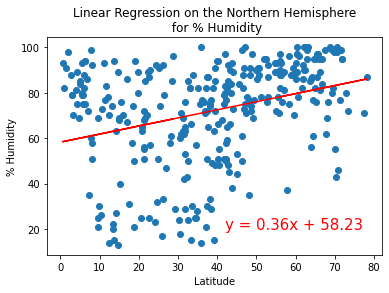

In [122]:
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for % Humidity''','% Humidity',(42,20))


Correlation coefficient is: 0.178
Probability value is: 0.025


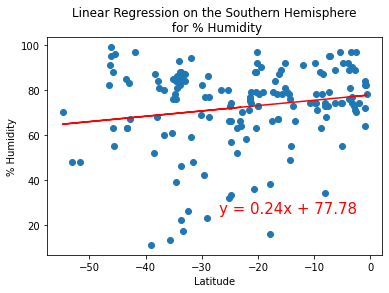

In [123]:
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for % Humidity''', '% Humidity',(-27,25))


Correlation coefficient is: 0.096
Probability value is: 0.091


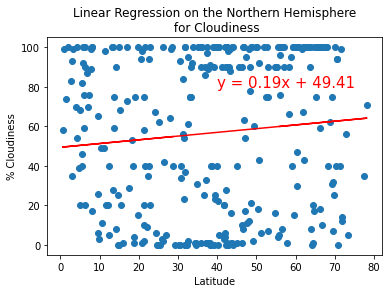

In [124]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Cloudiness''', '% Cloudiness',(40,80))

Correlation coefficient is: -0.044
Probability value is: 0.587


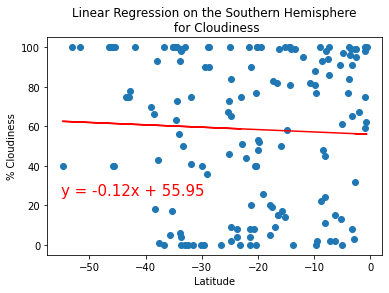

In [125]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Cloudiness''', '% Cloudiness',(-55,25))

Correlation coefficient is: 0.107
Probability value is: 0.059


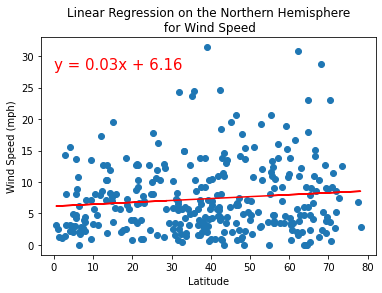

In [126]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere\n for Wind Speed''', 'Wind Speed (mph)',(0,28))

Correlation coefficient is: -0.375
Probability value is: 0.000


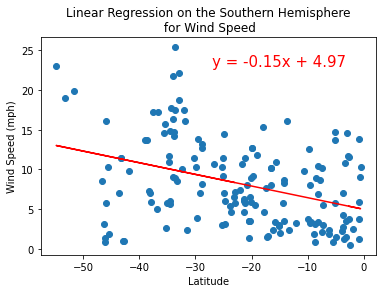

In [127]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere\n for Wind Speed''', 'Wind Speed (mph)',(-27,23))